# COVID-19 Global Data Tracker

This project analyzes COVID-19 global data including case trends, deaths, and vaccination progress using pandas, matplotlib, and seaborn.


2️⃣ Data Loading & Exploration


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


In [5]:
# Load full historical dataset
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Focus countries
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]

# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Fill missing values
df['total_cases'] = df['total_cases'].fillna(method='ffill')


/var/folders/zy/7b4hpjss0llbjx4th___gy3c0000gn/T/ipykernel_91052/1079745061.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['total_cases'] = df['total_cases'].fillna(method='ffill')


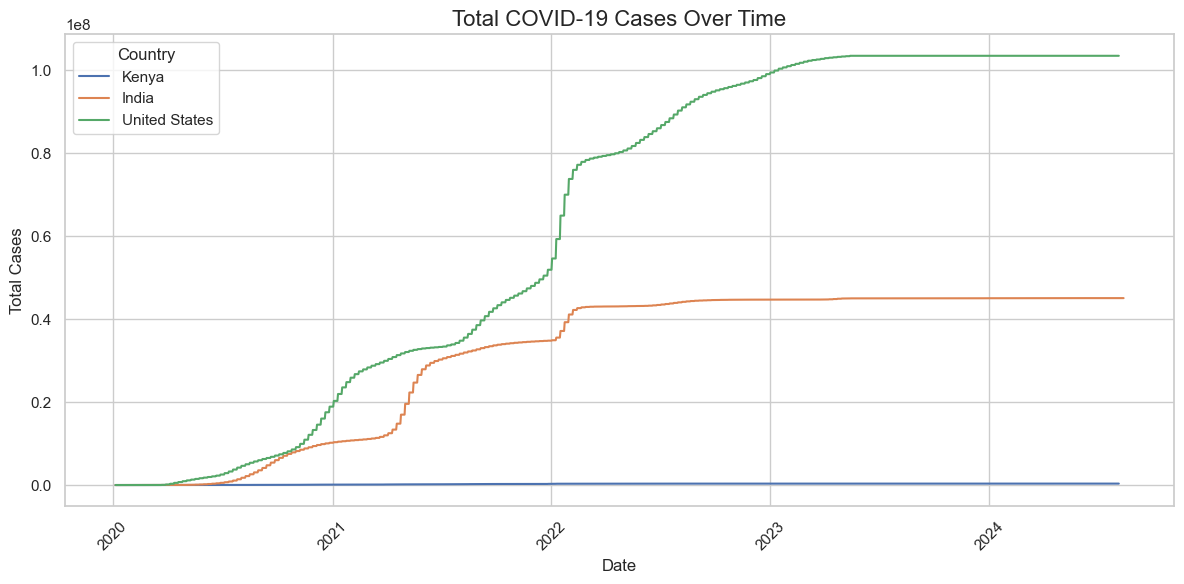

In [6]:
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Cases", fontsize=12)
plt.legend(title="Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


Choropleth Map (Using Plotly)

/var/folders/zy/7b4hpjss0llbjx4th___gy3c0000gn/T/ipykernel_91052/522533379.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  country_data['total_vaccinations'] = country_data['total_vaccinations'].fillna(method='ffill')
/var/folders/zy/7b4hpjss0llbjx4th___gy3c0000gn/T/ipykernel_91052/522533379.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['total_vaccinations'] = country_data['total_vaccinations'].fillna(method='ffill')


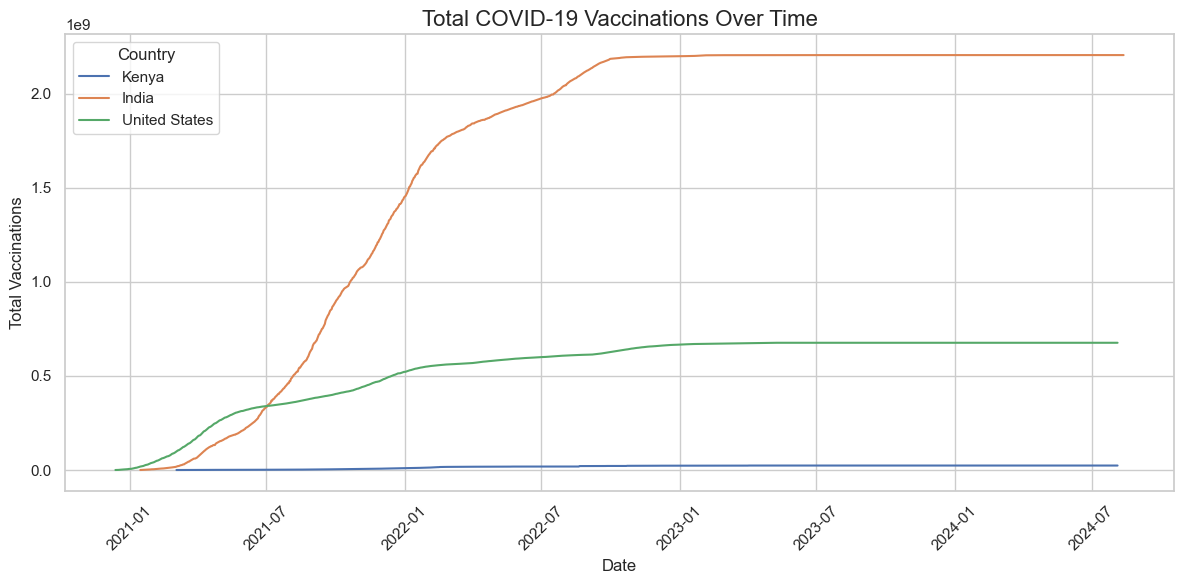

In [7]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

for country in countries:
    country_data = df[df['location'] == country]
    
    # Fill missing vaccination data forward
    country_data['total_vaccinations'] = country_data['total_vaccinations'].fillna(method='ffill')
    
    # Plot only if there's valid data
    if country_data['total_vaccinations'].notnull().any():
        plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title("Total COVID-19 Vaccinations Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Vaccinations", fontsize=12)
plt.legend(title="Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


Insights & Reflections 

### Key Insights:
- The USA had the highest number of cases overall.
- Kenya had a slower vaccination rate rollout compared to India and the USA.
- Death rates vary widely, possibly due to health system differences.
- Vaccinations increased sharply in early 2021.
